In [2]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [2]:
# GPU 사용 여부 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
     - 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, 얼굴식별, etc ...
     
     - 지도학습(회귀, 분석) vs 비지도학습(군집) vs 강화학습(게임)
     
 - 1. 데이터 확보 및 생성 (inputdata, outputdata)
 - 2. 데이터 전처리 (결측치, 스케일조정, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류, ...)
 - 3. 모델 구성
 - 4. 모델 학습 과정 설정 (손실함수, 옵티마이저, 평가지표)
 - 5. 모델 학습시키기
 - 6. 모델 평가(시험데이터셋)
 - 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여 입력값이 주어지면 예측값 받기)

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [37]:
# 독립변수가 숫자면 그 숫자일 확률이 종속변수 y(0부터 최댓값까지의 리스트)
# 0이 0% 1이 100%
# y의 합은 100%여야 함

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical  # 분류분석 시 원핫인코딩
from tensorflow.keras.models import Sequential     # 모델 생성
from tensorflow.keras.layers import Dense, Input   # 모델에 레이어 추가

In [4]:
# 학습데이터 == 훈련데이터 : 1차원(독립변수X 하나에 종속변수Y가 하나씩 매칭)
X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9] * 10)  # 90개
Y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18] * 10)  # 90개

# 검증데이터 : 1차원(9개)
X_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
Y_val = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [18]:
# 분류분석을 위한 인코딩 종류
data = np.array(['a', 'b', 'b', 'b', 'c'])
print('1. 원 데이터 : ', data)
print()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # 객체 생성
labeling_data = le.fit_transform(data)
print('2. 라벨 인코딩된 데이터 : ', labeling_data)
print(type(labeling_data))  # [] 안에 ','가 없으면 numpy array
print()

# to_categorical() 에는 라벨링된 데이터만 사용 가능
one_hot_encoding_data = to_categorical(labeling_data)
print('3. 원핫인코딩된 데이터(keras) : \n', one_hot_encoding_data)

1. 원 데이터 :  ['a' 'b' 'b' 'b' 'c']

2. 라벨 인코딩된 데이터 :  [0 1 1 1 2]
<class 'numpy.ndarray'>

3. 원핫인코딩된 데이터(keras) : 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [27]:
# 분류분석을 위한 원핫인코딩 방법
# to_categorical()을 이용하면 데이터가 1부터 시작해도 0이 자동 생성됨
data = np.array([1, 2, 2, 3, 2])
print('원 데이터 : ', data)
print()

categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원 핫 인코딩(넘파이 배열) : \n', categorical_one_hot)
print()

import pandas as pd
display('get_dummies를 이용한 원 핫 인코딩(데이터프레임) : \n', pd.get_dummies(data))

원 데이터 :  [1 2 2 3 2]

to_categorical을 이용한 원 핫 인코딩(넘파이 배열) : 
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]



'get_dummies를 이용한 원 핫 인코딩(데이터프레임) : \n'

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [29]:
Y_train[:2], Y_val[:2]

(array([2, 4]), array([2, 4]))

In [30]:
# 븐류분석을 위한 종속변수(target 변수)를 원핫인코딩
Y_train = to_categorical(Y_train, 19)  # Y데이터의 최대값이 18이므로 19개
Y_val   = to_categorical(Y_val)

In [31]:
Y_train[:2]  # 종속변수 전체를 합하면 1

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [35]:
print(X_train.shape)  # 1차원 독립변수 90개
print(Y_train.shape)  # 1차원 독립변수 90개 종속변수 19개
print(X_val.shape)
print(Y_val.shape)

(90,)
(90, 19)
(9,)
(9, 19)


In [38]:
X_train[:2]

array([1, 2])

In [39]:
Y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

# 3. 모델 구성

In [40]:
model = Sequential()
model.add(Input(shape=(1,)))  # 1 layer (1차원)
# Dense 생성 시 layer 1씩 추가됨
# ↓ hiddenlayer
model.add(Dense(units=38, activation='sigmoid'))  # 38*2 = 76
model.add(Dense(units=64, activation='elu'))      # 39*64 = 2496
model.add(Dense(units=32, activation='elu'))      # 65*32 = 2080
# 입력 1개로 최종적으로 19개를 출력
model.add(Dense(units=19, activation='softmax'))  # 33*19 = 627
# units= : 출력 갯수
# activation='' : 활성화 함수
# Input 1개, units 갯수만큼 출력
# activation='softmax' : 모든 출력의 합이 1이 됨. 분류분석의 마지막 layer에서 activation 함수로 사용

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정
 - 손실함수, 옵티마이저, 평가지표
     * loss='categorical_crossentropy' : 딥러닝 훈련 시 다중분류분석에서의 손실함수
         * 모델의 예측 확률 분포와 실제값의 확률 분포가 얼마나 다른지 계산
     * metrics=['accuracy'] : 정확도

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [43]:
hist = model.fit(X_train, Y_train,               # 훈련(학습)데이터
                 epochs=300,                     # 학습횟수
                 batch_size=10,                  # 가중치를 조정하는 단위
                 verbose=2,                      # 0:출력 없음, 1:진행상황만 출력, 2:epochs별 로그메세지 전부 출력
                 validation_data=(X_val, Y_val)  # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.9876 - accuracy: 0.0889 - val_loss: 2.6827 - val_accuracy: 0.1111 - 855ms/epoch - 95ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5544 - accuracy: 0.1444 - val_loss: 2.4057 - val_accuracy: 0.2222 - 42ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3382 - accuracy: 0.2222 - val_loss: 2.2360 - val_accuracy: 0.2222 - 41ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.1927 - accuracy: 0.1778 - val_loss: 2.1249 - val_accuracy: 0.2222 - 45ms/epoch - 5ms/step
Epoch 5/300
9/9 - 0s - loss: 2.0956 - accuracy: 0.2111 - val_loss: 2.0354 - val_accuracy: 0.2222 - 42ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.0195 - accuracy: 0.2222 - val_loss: 1.9574 - val_accuracy: 0.2222 - 40ms/epoch - 4ms/step
Epoch 7/300
9/9 - 0s - loss: 1.9373 - accuracy: 0.2667 - val_loss: 1.8878 - val_accuracy: 0.3333 - 41ms/epoch - 5ms/step
Epoch 8/300
9/9 - 0s - loss: 1.8697 - accuracy: 0.2778 - val_loss: 1.8183 - val_accuracy: 0.3333 - 43ms/epoch - 5ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.3607 - accuracy: 0.9667 - val_loss: 0.3403 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3527 - accuracy: 1.0000 - val_loss: 0.3264 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3323 - accuracy: 1.0000 - val_loss: 0.3131 - val_accuracy: 1.0000 - 47ms/epoch - 5ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3206 - accuracy: 1.0000 - val_loss: 0.3064 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3048 - accuracy: 1.0000 - val_loss: 0.2959 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 0.2965 - accuracy: 1.0000 - val_loss: 0.2849 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2933 - accuracy: 1.0000 - val_loss: 0.2884 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2906 - accuracy: 1.0000 - val_loss: 0.2739 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 278/300
9/

# 6. 모델과정 평가하기
 - 학습과정 중 loss와 평가지표(accuracy) 살펴보기, evaluate함수

In [44]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

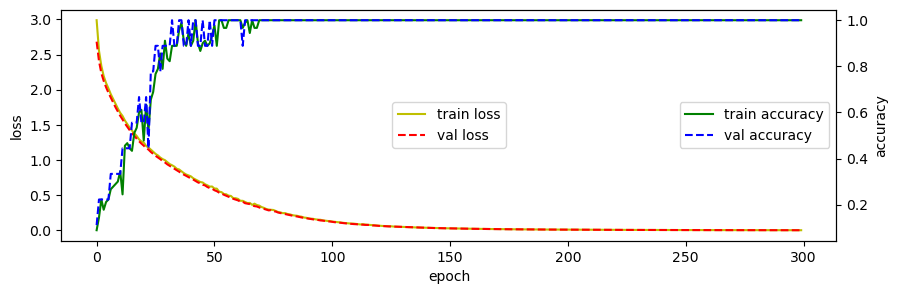

In [69]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10, 3))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r--', label='val loss')  # marker='*'
acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b--', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [71]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=3)

3/3 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000


In [72]:
score  # [0] loss data, [1] accuracy

[0.002926512621343136, 1.0]

In [74]:
print('평가된 loss 값 : ', score[0])
print('평가된 accuracy : ', score[1] * 100, '%')

평가된 loss 값 :  0.002926512621343136
평가된 accuracy :  100.0 %


# 7. 모델 사용하기(모델을 사용해서 예측하기)

In [75]:
H = model.predict(np.array([4]))
H

1/1 [==============================] - 0s 129ms/step


array([[3.2496766e-17, 8.3391553e-23, 7.3356226e-23, 1.1990034e-21,
        2.2406155e-09, 8.2221189e-24, 8.7956997e-04, 2.9160114e-27,
        9.9796695e-01, 5.4454904e-23, 1.1534196e-03, 4.1384110e-32,
        5.6044661e-12, 3.1675318e-29, 2.0479645e-19, 9.9385731e-29,
        1.2437226e-34, 3.5602153e-19, 0.0000000e+00]], dtype=float32)

In [76]:
model.predict(np.array([4])).argmax()

1/1 [==============================] - 0s 31ms/step


8

In [78]:
H[:]  # 2차원

array([[3.2496766e-17, 8.3391553e-23, 7.3356226e-23, 1.1990034e-21,
        2.2406155e-09, 8.2221189e-24, 8.7956997e-04, 2.9160114e-27,
        9.9796695e-01, 5.4454904e-23, 1.1534196e-03, 4.1384110e-32,
        5.6044661e-12, 3.1675318e-29, 2.0479645e-19, 9.9385731e-29,
        1.2437226e-34, 3.5602153e-19, 0.0000000e+00]], dtype=float32)

In [80]:
# 몇 퍼센트(%)의 확률로 분류되었는지 확인 시
H[0, H.argmax()]

0.99796695

# 8. 모델 저장하기

In [81]:
model.save('model/2_deep_begin.h5')

# 저장된 모델 사용하기

In [5]:
from tensorflow.keras.models import load_model
import numpy as np
model2 = load_model('model/2_deep_begin.h5')

In [7]:
H = model2.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 27ms/step


4

In [9]:
# 몇 퍼센트(%)의 확률로 분류되었는지 확인 시
H[0, H.argmax()]

0.9987417

In [10]:
H[0, [2, 4, 6]]

array([6.0336344e-04, 9.9874169e-01, 6.5499730e-04], dtype=float32)

In [15]:
[round(val, 3) for val in H[0, [2, 4, 6]]]

[0.001, 0.999, 0.001]